Домашнее задание:


Задание 1: Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

Задание 2: Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

Задание 3: Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

Задание 4: Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

Задание 5: Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

Задание 6: Могла ли модель переобучиться? Почему?

Задание 7 (опциональное): Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [141]:
import numpy as np
import matplotlib.pyplot as plt

In [157]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [158]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [159]:
def calc_logloss(y, y_pred):
    y_pred = np.clip(y_pred, 1e-5, 1-1e-5)
    err = - np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return err

In [160]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [209]:
def calc_std_feat(x):
    x_st = x[1:,].copy()
    x_mean, x_std = x_st.mean(axis=1).reshape(-1,1), x_st.std(axis=1).reshape(-1,1)
    x[1:,] = (x_st - x_mean) / x_std
    return x

In [210]:
X_st = X.copy()
X_st = calc_std_feat(X_st)

In [211]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [212]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [213]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [228]:
def eval_model(X, y, iterations, alpha=1e-4, tol=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors_history = []
    weights_history = [W]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        errors_history.append(err)
        W = W - alpha * (1/n * np.dot((y_pred - y), X.T))
        weights_history.append(W)
        if i > 2 and np.fabs(errors_history[-1]-errors_history[-2]) < tol:
            print(i, W, err)
            break
#     if i % (iterations / 10) == 0:
#         print(i, W, err)
    return W, errors_history, weights_history

In [229]:
def plot_fit_history(weights_history: np.array,
                     errors_history: np.array, 
                     figsize=(15, 5)) -> None:
       
    
        fig = plt.figure(figsize=(15, 5))
        plt.suptitle(
            f"Optional rounds: {len(errors_history)}, Error: {errors_history[-1]}",
            size=15
        )
        plt.subplot(121)
        plt.plot(errors_history, linewidth=3)
        plt.xlabel("n_iterations", size=15)
        plt.ylabel("log_loss", size=15)


        plt.subplot(122)
        plt.plot(weights_history, linewidth=3)
        plt.legend([f"$w_{i}$" for i in range(len(weights_history[0]))], loc="best", fontsize=15)
        plt.xlabel("n_iterations", size=15)
        plt.ylabel("w", size=15)

6236 [ 1.80385313 -5.00023322 -4.03203415 10.50060735] 0.20882355724960683
5402 [ 0.94497979 -3.70742992 -2.36495449  7.05081304] 0.25762946894421507
6193 [ 0.22322901 -2.33314778 -0.81934289  3.73020567] 0.3379492576690167
7025 [ 0.11224077 -1.88504308 -0.51103931  2.89905277] 0.3756084157038927
5495 [ 0.19641082 -0.94005846 -0.0076054   1.43621037] 0.49456917344192275
8140 [ 0.45930427 -0.33157412  0.47217682  1.43686081] 0.6690360538916054
3 [ 0.49671307 -0.13827183  0.64768158  1.52302618] 0.7638459455209106


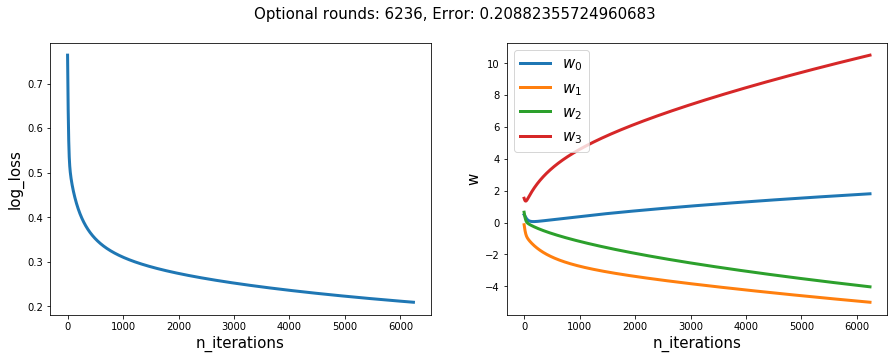

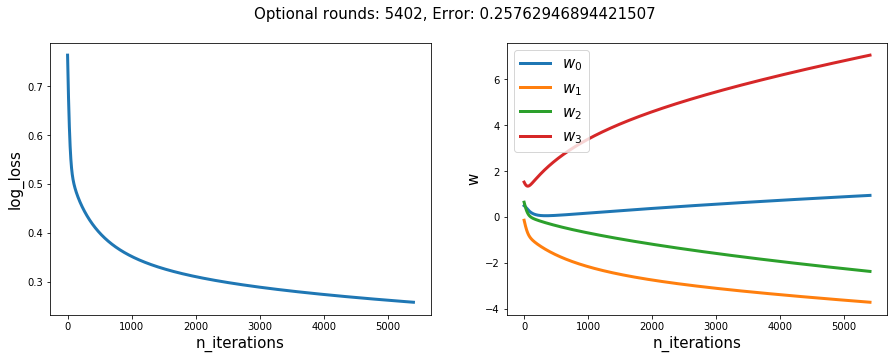

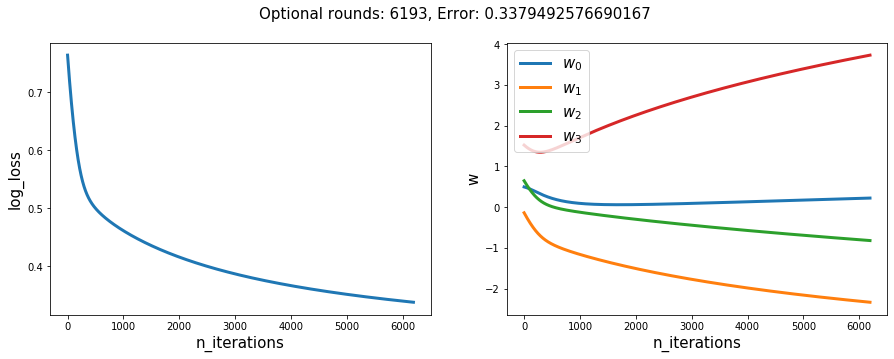

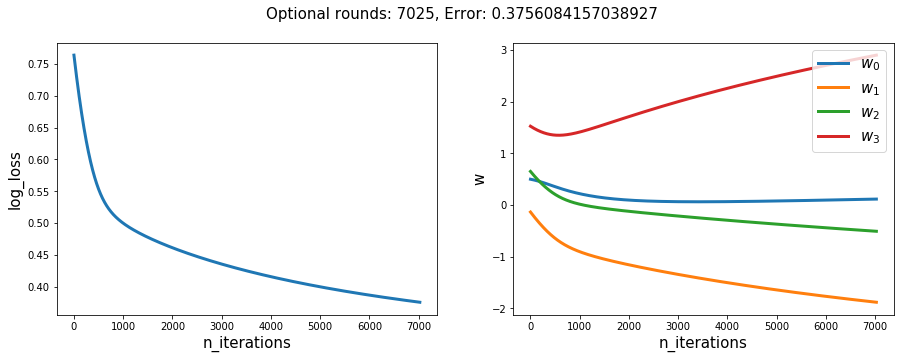

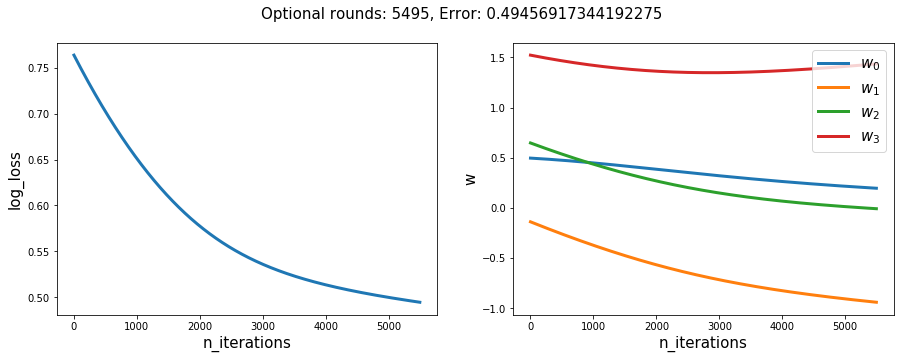

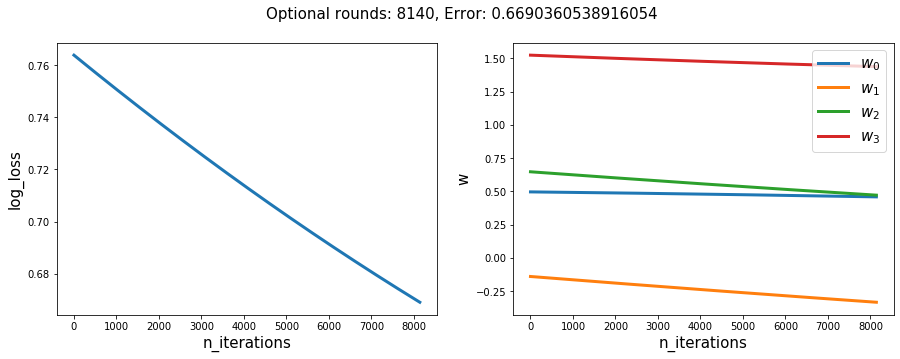

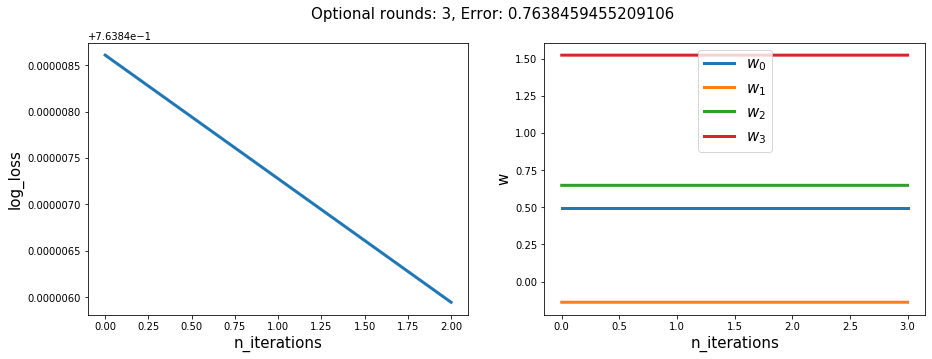

In [243]:
for alpha in [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001, 0.00001]:
    W, err, w_hist = eval_model(X_st, y, iterations=1000000, alpha=alpha, tol = 1e-5)
    plot_fit_history(w_hist, err)


In [244]:
W, err, w_hist = eval_model(X_st, y, iterations=1000000, alpha=0.1, tol = 1e-5)

6236 [ 1.80385313 -5.00023322 -4.03203415 10.50060735] 0.20882355724960683


In [252]:
def calc_pred_proba(W, x):
    y_pred_proba = sigmoid(np.dot(W, x))
    return y_pred_proba

In [253]:
calc_pred_proba(w_hist[-1], X_st)

array([0.30994281, 0.07846163, 0.99984619, 0.16356878, 0.76372114,
       0.18106314, 0.99997583, 0.07899179, 0.40501197, 0.99877164])

In [254]:
def  calc_pred(W, X):
    
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    W = W.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(W.T, X))
    
#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_predicted[:, i] = 0
    
    return y_predicted

In [258]:
y_pred = calc_pred(W, X_st)

In [259]:
y_pred

array([[0., 0., 1., 0., 1., 0., 1., 0., 0., 1.]])

In [260]:
def accuracy(y, y_pred):
    return 100.0 - np.mean(np.abs(y - y_pred)*100.0)

In [261]:
accuracy(y, y_pred)

90.0

In [279]:
def err_matrix(y, y_pred):
    m = np.zeros((2, 2))
    m[0,0] = np.sum(np.where(y == 1, y == y_pred, False))
    m[1,1] = np.sum(np.where(y == 0, y == y_pred, False))
    m[1,0] = np.sum(np.where(y == 1, y != y_pred, False))
    m[0,1] = np.sum(np.where(y == 0, y != y_pred, False))
    return m

In [283]:
matr = err_matrix(y, y_pred)

In [294]:
def precision(y, y_pred):
    matr = err_matrix(y, y_pred)
    return matr[0,0]/(matr[0,0]+matr[0,1])
def recall(y, y_pred):
    matr = err_matrix(y, y_pred)
    return matr[0,0]/(matr[0,0]+matr[1,0])
def F_score(y, y_pred, b=1):
    p = precision(y, y_pred)
    r = recall(y, y_pred)
    f = (1+np.square(b))*(p*r)/(np.square(b)*p+r)
    return f

In [290]:
precision(y, y_pred)

1.0

In [291]:
recall(y, y_pred)

0.8

In [295]:
F_score(y, y_pred)

0.888888888888889

In [322]:
def eval_model_rwgularization(X, 
                              y, 
                              iterations, 
                              alpha=1e-4, 
                              tol=1e-4,
                              a_l2 = 0,
                              a_l1 = 0):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors_history = []
    weights_history = [W]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        errors_history.append(err)
        W = W - alpha * (1/n * np.dot((y_pred - y), X.T)) + a_l1 * 2  * W + a_l2  * W/np.abs(W)
        weights_history.append(W)
        if i > 2 and np.fabs(errors_history[-1]-errors_history[-2]) < tol:
            print(i, W, err)
            break
    return W, errors_history, weights_history

499 [ 0.78806645 -4.34482215  0.40178578  4.88816581] 0.35536137198187384


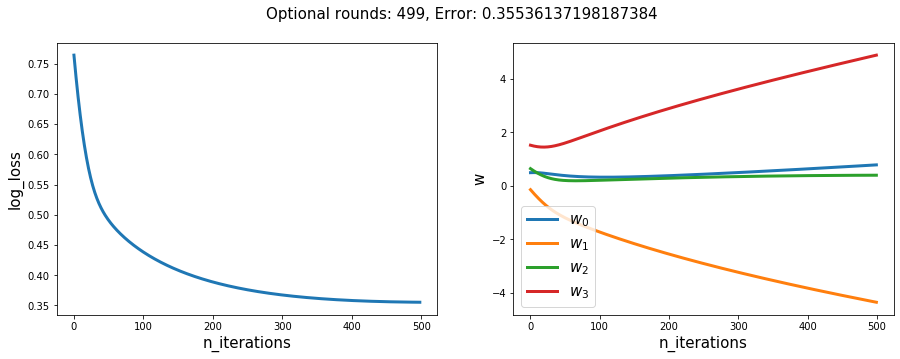

In [325]:
W, err, w_hist = eval_model_rwgularization(X_st, y, iterations=1000000, alpha=0.1, tol = 1e-5, a_l2 = 0.005)
plot_fit_history(w_hist, err)

179 [ 0.83574611 -5.88515864 -1.04605761  7.96175378] 0.2947474725307052


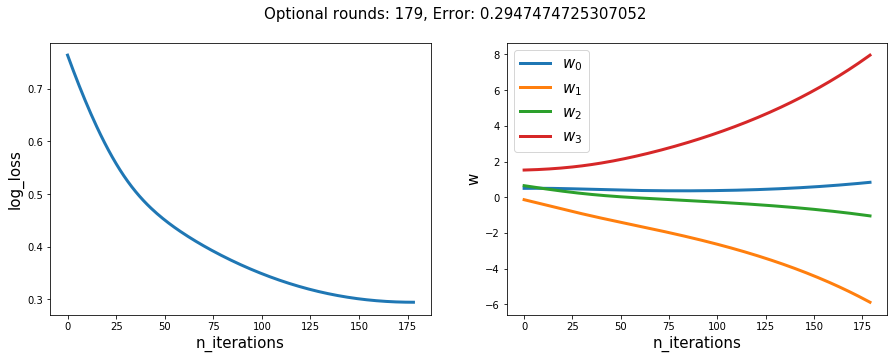

In [324]:
W, err, w_hist = eval_model_rwgularization(X_st, y, iterations=1000000, alpha=0.1, tol = 1e-5, a_l1 = 0.005)
plot_fit_history(w_hist, err)